Numpy implementation
---

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('bike-sharing.csv')
data_df.head()

,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


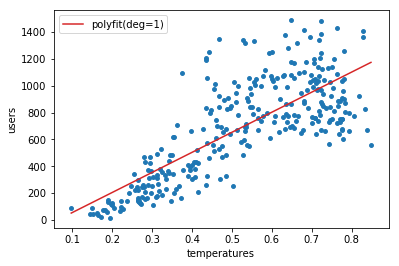

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Linear regression using polyfit
x = data_df.temp.values
y = data_df.users.values
coefs = np.polyfit(x, y, deg=1)

# Plot prediction curve
x_values = np.linspace(x.min(), x.max(), num=100)
y_values = np.polyval(coefs, x_values)
plt.scatter(x, y, s=15)
plt.plot(x_values, y_values, c='C3', label='polyfit(deg=1)')
plt.xlabel('temperatures')
plt.ylabel('users')
plt.legend()
plt.show()

In [3]:
# Root mean squared error (RMSE)
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [17]:
# Initialization
lr = 0.7 # learning rate
a, b = 0, 0
n_steps = 400

In [18]:
# Save RMSE after each iteration
log_rmse = []

for step in range(n_steps):
    # Predictions with the current a,b values
    y_pred = a*x + b

    # Compute the error vector
    error = y - y_pred

    # Partial derivative with respect to a
    a_grad = -2*np.mean(x*error)

    # Partial derivative with respect to b
    b_grad = -2*np.mean(error)

    # Update a and b
    a -= lr*a_grad
    b -= lr*b_grad

    # RMSE error
    log_rmse.append(rmse(y, y_pred))

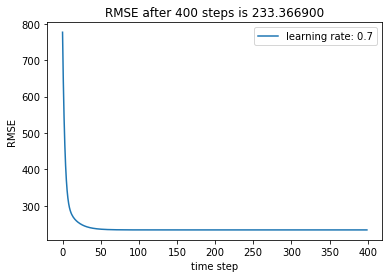

In [19]:
# Plot RMSE values
plt.plot(log_rmse, label='learning rate: {}'.format(lr))
plt.title('RMSE after {} steps is {:.6f}'.format(n_steps, log_rmse[-1]))
plt.xlabel("time step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

## Annex - plotting the error surface

In [20]:
a_polyfit, b_polyfit =  np.polyfit(x, y, deg=1)

# Optimal parameters vs. ones obtained with GD
print('Polyfit (a, b)=({:.2f}, {:.2f})'.format(a_polyfit, b_polyfit))
print('Gradient descent (a, b)=({:.2f}, {:.2f})'.format(a, b))

Polyfit (a, b)=(1495.60, -94.61)
Gradient descent (a, b)=(1495.60, -94.61)
